# Preparation data for classification a tree on a photo of a leaf

## Import Library

In [17]:
import pandas as pd
import numpy as np
import os, sys
from random import sample
import pickle

from tensorflow.keras.models import load_model
from IPython.display import Image
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt


## Import data

In [18]:
#size of the side of the picture in pixels
SIZE = 224

class_name = {
    0: 'apple', 
    1: 'birch', 
    2: 'maple', 
    3: 'oak', 
    4: 'willow'}

#### Save dict `class_name` in file

In [19]:
#save to file
with open('class_name_dict', 'wb') as f:
    pickle.dump(class_name, f)

### Resize the photo and turn it into a vector

In [20]:
# photo to array
# dataset of photos not added to repository
x_train = []
y_train = []
img_list = []
for files in class_name.keys():
    # unload all the file names from the folder
    photo = os.listdir(f'dataleaf/{class_name.setdefault(files)}')
    for leaf in photo:
        img = image.load_img(f'dataleaf/{class_name.setdefault(files)}/{leaf}', 
                             target_size=(SIZE, SIZE), 
                             color_mode='grayscale')
        img_list.append(img)
        #convert the image into an array
        img_arr = image.img_to_array(img)
        #convert the shape of the array to a flat vector
        img_arr = img_arr.reshape(1, SIZE*SIZE)
        #invert the image
        img_arr = 255 - img_arr
        #normalize the image
        img_arr /= 255
        img_arr_list = list(img_arr[0])
        x_train.append(img_arr_list)
        y_train.append(files)

### Show some photo

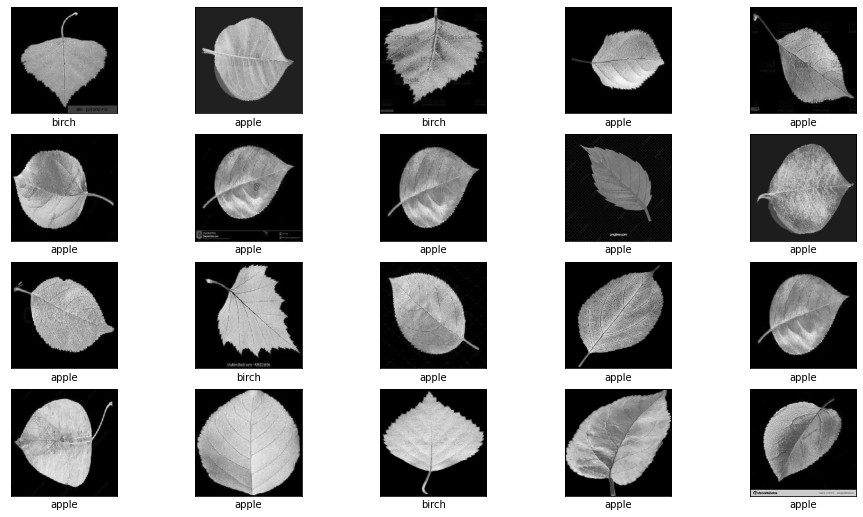

In [21]:
plt.figure(figsize=(16,9))
#list of random photo leaves
lst = sample(range(0, 80), 20)

for i in lst:
    plt.subplot(4,5,lst.index(i)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[y_train[i]])

#### Save the list with photo vectors

In [22]:
#save x_train
with open('x_train', 'wb') as fp:
    pickle.dump(x_train, fp)
    
#save y_train
with open('y_train', 'wb') as fp:
    pickle.dump(y_train, fp)